In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
df = pd.read_csv('Geometric fit/geom_trajectories.csv')
df

,SeasonLength,Trajectory,Time,x0,x1,x2,x3
0,10,0,10.1,48,2,0,0
1,10,0,20.0,49,0,0,0
2,10,0,30.0,32,9,0,0
3,10,0,40.0,41,1,0,0
4,10,0,50.0,39,0,0,0
...,...,...,...,...,...,...,...
633279,100,9995,100.1,2,87,0,0
633280,100,9996,100.1,0,78,0,0
633281,100,9997,100.1,1,83,0,0
633282,100,9998,100.1,0,85,0,0


In [3]:
dfplot = df.groupby(['SeasonLength','Time']).mean().reset_index()
dfplot

,SeasonLength,Time,Trajectory,x0,x1,x2,x3
0,10,10.1,4999.500000,43.230800,1.934200,0.050200,0.012200
1,10,20.0,4999.500000,42.318500,0.100500,2.941200,0.158400
2,10,30.0,4999.300530,41.540654,3.946395,0.134113,0.430443
3,10,40.0,4999.300530,40.991699,0.195120,4.216222,0.759876
4,10,50.0,4999.050510,40.175035,5.138828,0.219944,1.101420
...,...,...,...,...,...,...,...
95,100,600.0,5003.918382,8.322288,0.221486,46.180328,20.456226
96,100,700.0,5035.661565,7.828656,46.399235,0.216837,20.978741
97,100,800.0,5067.375723,6.657909,0.257488,46.022596,23.433526
98,100,900.0,5051.892308,7.044872,45.319872,0.267949,23.737179


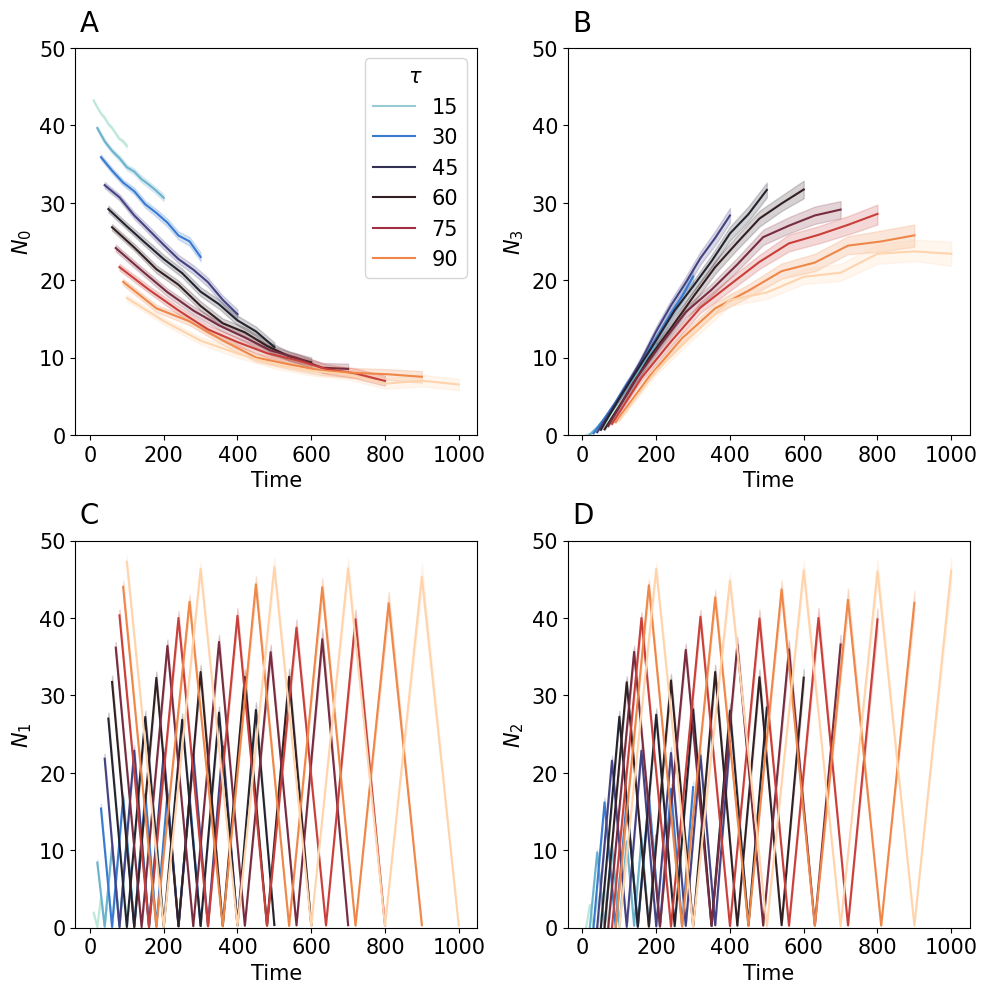

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

palette='icefire'

plt.subplot(2,2,1)
sns.lineplot(data=df, x='Time', y='x0', hue='SeasonLength', palette=palette)
plt.legend(title=r'$\tau$',fontsize=15,title_fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,50)
plt.xlabel('Time',fontsize=15)
plt.ylabel('$N_0$',fontsize=15)

plt.subplot(2,2,2)
sns.lineplot(data=df, x='Time', y='x3', hue='SeasonLength', palette=palette,legend=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,50)
plt.xlabel('Time',fontsize=15)
plt.ylabel('$N_3$',fontsize=15)

plt.subplot(2,2,3)
sns.lineplot(data=df, x='Time', y='x1', hue='SeasonLength', palette=palette,legend=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,50)
plt.xlabel('Time',fontsize=15)
plt.ylabel('$N_1$',fontsize=15)

plt.subplot(2,2,4)
sns.lineplot(data=df, x='Time', y='x2', hue='SeasonLength', palette=palette,legend=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,50)
plt.xlabel('Time',fontsize=15)
plt.ylabel('$N_2$',fontsize=15)

axes = axes.flatten()
# Letras A, B, C, ...
letters = ['A','B','C','D','E','F','G','H','I','J']

for i, ax in enumerate(axes):
    # Agrega la letra en la esquina superior izquierda de cada subplot
    ax.text(
        0.01, 1.1, letters[i],                # posición relativa en el eje (0,0 es abajo izquierda)
        transform=ax.transAxes,                # usa coordenadas relativas al eje
        fontsize=20, va='top'
    )

plt.tight_layout()
#plt.savefig('../Fig supp/PoblacionmediageometricFIT.png',dpi=300)
plt.show()

**Mean population trajectories**. Mean values of the trajectories simulated for the geometric fit. Shades indicate 95\% confidence interval. We observe that those that survive achive double-resistant mutants. 
(*A*) $N_0$. (*B*) $N_3$. (*C*) $N_1$ oscillatory behavior. (*D*) $N_2$ oscillatory behavior.